In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import array
from sklearn.preprocessing import LabelEncoder
import scipy.stats as s
from functools import reduce
from matplotlib import pyplot as plt
import seaborn as sns


os.chdir("C:/Users/FARIYA/Desktop")
dataset2 = pd.read_csv('loan_data_set.csv')
display(dataset2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [2]:
missing=["na","--"]

In [4]:
dataset2=pd.read_csv("loan_data_set.csv" ,na_values=missing)

In [5]:
dataset2['Gender'].mode()
dataset2['Gender'].fillna(dataset2['Gender'].mode()[0],inplace=True)

In [6]:
dataset2['Married'].mode()
dataset2['Married'].fillna(dataset2['Married'].mode()[0],inplace=True)

In [7]:
dataset2.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
dataset2.dropna(axis=1,thresh=0.70*len(dataset2),inplace=True)

In [9]:
mode=dataset2['Dependents'].mode().values[0]

In [10]:
dataset2['Dependents'].fillna(mode, inplace=True)

In [11]:
dataset2['Self_Employed'].mode()
dataset2['Self_Employed'].fillna(dataset2['Self_Employed'].mode()[0],inplace=True)

In [12]:
median=dataset2['LoanAmount'].median()

In [13]:
dataset2['LoanAmount'].fillna(median, inplace=True)

In [14]:
dataset2['Credit_History'].mode()
dataset2['Credit_History'].fillna(dataset2['Credit_History'].mode()[0],inplace=True)

In [15]:
median=dataset2['Loan_Amount_Term'].median()
dataset2['Loan_Amount_Term'].fillna(median, inplace=True)

In [16]:
dataset2.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [17]:
dataset2.drop(columns=['Dependents'],inplace=True)

In [18]:
dataset2.drop(columns=['Self_Employed'],inplace=True)

In [19]:
dataset2.drop(columns=['Gender'],inplace=True)

In [21]:
dataset2['Loan_Status'].replace(to_replace='Y', value=1, inplace=True)
dataset2['Loan_Status'].replace(to_replace='N',  value=0, inplace=True)
df_dummies = pd.get_dummies(dataset2)

y = df_dummies['Loan_Status'].values
X = df_dummies.drop(columns = ['Loan_Status'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
result=model.fit(X_train, y_train)

In [24]:
model.predict(X_test)

array([1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [25]:
ypred = model.predict_proba(X_test)
ypred[:, 1]

array([0.8, 1. , 1. , 0.2, 0.6, 0. , 0.8, 1. , 0.8, 0.8, 1. , 0.8, 0.2,
       0.8, 1. , 0.4, 0.6, 1. , 0.8, 1. , 0.4, 0.8, 0.2, 1. , 0.8, 1. ,
       1. , 1. , 1. , 1. , 1. , 0.8, 1. , 0. , 0.8, 1. , 0.8, 1. , 1. ,
       0.6, 1. , 0.8, 0.8, 1. , 0.6, 0.4, 0.8, 1. , 0.4, 0.8, 1. , 0.8,
       0.8, 0.8, 0.8, 0.2, 0. , 0.8, 1. , 1. , 0.6, 1. , 0. , 0.6, 0.4,
       1. , 1. , 0.4, 0.8, 0. , 0.8, 0. , 1. , 0.8, 0.2, 1. , 0.8, 0.8,
       1. , 1. , 0. , 0.6, 1. , 0. , 0. , 0.8, 1. , 0.4, 0.6, 0.2, 1. ,
       0.6, 1. , 0.8, 0.6, 1. , 1. , 1. , 1. , 0.8, 1. , 0.6, 0.8, 1. ,
       1. , 0.8, 0.6, 0.4, 0.6, 0.8, 0. , 0.2, 0.8, 0. , 1. , 0.4, 0.8,
       0.2, 1. , 1. , 0.8, 0.8, 0. , 0.4, 0.2, 1. , 0.8, 0.8, 0. , 0.8,
       0.8, 1. , 0.6, 1. , 1. , 1. , 0.8, 0.6, 0.8, 1. , 0.6, 0. , 0.8,
       0.8, 1. , 1. , 0.6, 0.8, 1. , 0.2, 1. , 1. , 1. , 1. , 1. , 0.8,
       0.2, 0.6, 1. , 0.8, 1. , 0.8, 0.8, 1. , 0.2, 1. , 0.6, 1. , 0.6,
       0.8, 1. , 0.2, 1. , 0.8, 0.8, 1. , 0.8, 0. , 1. , 1. , 1.

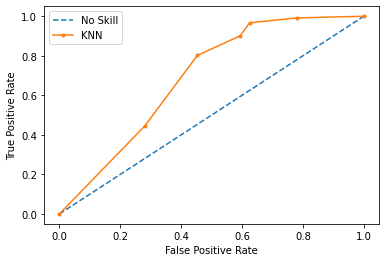

In [26]:
from sklearn import metrics
from sklearn.metrics import roc_curve

prediction_test = model.predict_proba(X_test)
prediction_test1 = prediction_test[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test,prediction_test1)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='KNN')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

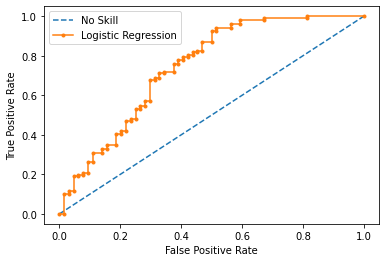

In [28]:
prediction_test = model.predict_proba(X_test)
prediction_test1 = prediction_test[:, 1]
# calculate roc curves
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test,prediction_test1)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_lr, tpr_lr, marker='.', label='Logistic Regression')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [29]:
from sklearn.naive_bayes import MultinomialNB

#Create a Gaussian Classifier
gnb = MultinomialNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [30]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.654054054054054


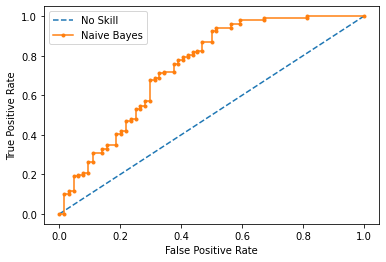

In [31]:
prediction_test = model.predict_proba(X_test)
prediction_test1 = prediction_test[:, 1]
# calculate roc curves
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,prediction_test1)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_nb, tpr_nb, marker='.', label='Naive Bayes')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [35]:
from sklearn.svm import SVC
model = SVC(kernel='linear', probability=True)
result = model.fit(X_train, y_train);

In [36]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
accuracy = metrics.accuracy_score(y_test, prediction_test)
confusion_matrix = metrics.confusion_matrix(y_test, prediction_test)
classification = metrics.classification_report(y_test, prediction_test)
print()
print()
print ("MODEL ACCURACY:" "\n", accuracy)
print()
print("CONFUSION MATRIX:" "\n", confusion_matrix)
print()
print("CLASSIFICATION REPORT:" "\n", classification) 
print()



MODEL ACCURACY:
 0.7837837837837838

CONFUSION MATRIX:
 [[ 26  38]
 [  2 119]]

CLASSIFICATION REPORT:
               precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185




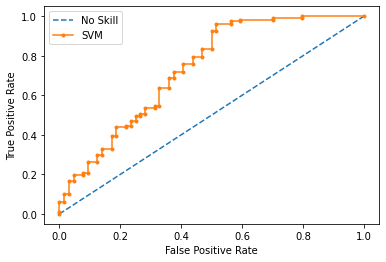

In [37]:
from sklearn import metrics

from sklearn.metrics import roc_curve
prediction_test = model.predict_proba(X_test)
prediction_test1 = prediction_test[:, 1]
# calculate roc curves
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test,prediction_test1)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr_svm, tpr_svm, marker='.', label='SVM')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [38]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='poly', degree=8)
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 26  38]
 [  4 117]]
              precision    recall  f1-score   support

           0       0.87      0.41      0.55        64
           1       0.75      0.97      0.85       121

    accuracy                           0.77       185
   macro avg       0.81      0.69      0.70       185
weighted avg       0.79      0.77      0.75       185



In [39]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 27  37]
 [  7 114]]
              precision    recall  f1-score   support

           0       0.79      0.42      0.55        64
           1       0.75      0.94      0.84       121

    accuracy                           0.76       185
   macro avg       0.77      0.68      0.69       185
weighted avg       0.77      0.76      0.74       185



In [40]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 26  38]
 [  2 119]]
              precision    recall  f1-score   support

           0       0.93      0.41      0.57        64
           1       0.76      0.98      0.86       121

    accuracy                           0.78       185
   macro avg       0.84      0.69      0.71       185
weighted avg       0.82      0.78      0.76       185

